<a href="https://colab.research.google.com/github/dilyara28/Sagdeeva-Dilyara/blob/main/laba_2_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving lemon.jpg to lemon (16).jpg


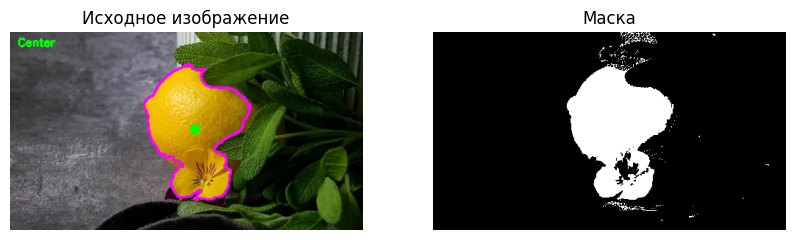

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

uploaded = files.upload()
image_path = next(iter(uploaded))

#считываем кадр
frame = cv2.imread(image_path)

#преобразуем в HSV
frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#задаем пороги
low_yellow = np.array([20, 110, 110])
high_yellow = np.array([40, 255, 255])

mask = cv2.inRange(frame_hsv, low_yellow, high_yellow)
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

count = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100:  # Фильтрация по площади
        count += 1

        # Вычисляем моменты
        M = cv2.moments(contour)

        # Проверяем наличие ключа "m00" и его значение
        if "m00" in M and M["m00"] != 0:  # Проверяем, чтобы избежать деления на ноль
            cX = int(M["m10"] / M["m00"])  # X-координата центра
            cY = int(M["m01"] / M["m00"])  # Y-координата центра

            # Рисуем контуры и центр
            cv2.drawContours(frame, [contour], -1, (255, 0, 255), 2)
            cv2.circle(frame, (cX, cY), 7, (0, 255, 0), -1)  # Рисуем центр зеленым цветом
            cv2.putText(frame, "Center", (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

#выводим кадр
plt.figure(figsize=(10, 5)) #размер в дюймах
plt.subplot(1, 2, 1)
plt.title('Исходное изображение')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Маска')
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()